In [9]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [12]:
file_url = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_v2.csv"
students = pd.read_csv(file_url)

#students.describe()

students.head()


,index,borough,age,gpa,days_missed,major,full_time,freshman,first_generation,employed,pell_grant,grade
0,8548,Queens,22.056321,3.148877,2,Computer Information Systems,1,1,0,0,1,P
1,13142,Outside NYC,22.345859,2.333427,16,Computer Science,1,1,1,0,1,DWFI
2,5703,Outside NYC,25.161810,3.201160,16,Computer Information Systems,0,1,1,1,1,DWFI
3,13839,Bronx,18.302638,2.715759,2,Computer Information Systems,1,1,0,1,0,P
4,5384,Outside NYC,25.673518,2.079928,2,Computer Information Systems,1,0,1,0,1,P


In [13]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=15) # 70% training and 30% test

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# precision: true predicted positives/all predicted positives
print("Precision:",metrics.precision_score(y_test, y_pred))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.7576470588235295
Precision: 0.6839028776978417
Recall: 0.6730088495575222
[[5974 1406]
 [1478 3042]]


In [26]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=7)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# precision: true predicted positives/all predicted positives
print("Precision:",metrics.precision_score(y_test, y_pred))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.7573109243697479
Precision: 0.7081632653061225
Recall: 0.6141592920353982
[[6236 1144]
 [1744 2776]]


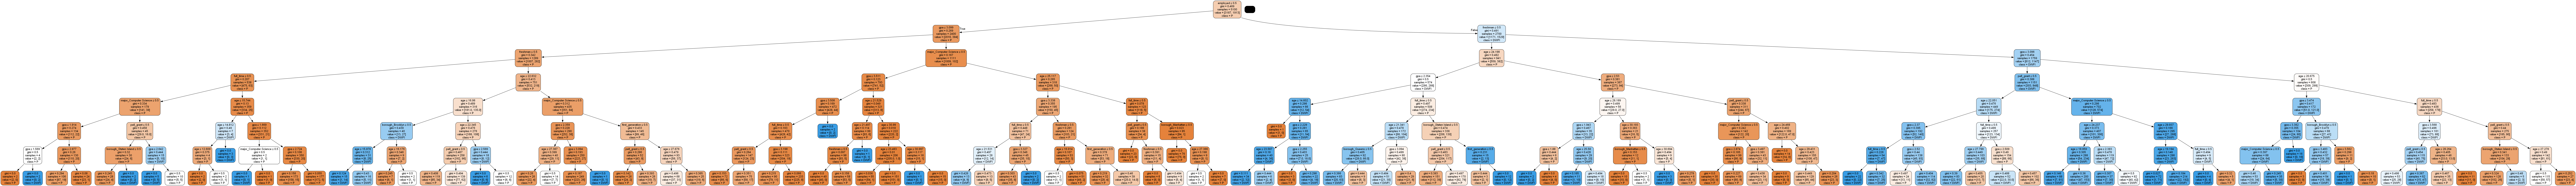

In [27]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [16]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.7649579831932773
Precision: 0.7734052681688353
Recall: 0.5391592920353983
[[6666  714]
 [2083 2437]]


In [57]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf2 = RandomForestClassifier(criterion="gini", max_depth=4, n_estimators=115)

# Train Decision Tree Classifer
clf_rf2 = clf_rf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf2 = clf_rf2.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf2))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf2))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf2))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf2, y_true=y_test)
print(c_matrix)

Accuracy: 0.7739495798319328
Precision: 0.7703900709219859
Recall: 0.5767699115044248
[[6603  777]
 [1913 2607]]


In [17]:
### GRADIENT BOOSTING


# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=5, n_estimators=60, learning_rate=0.4, verbose=True)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb))
### GRADIENT
# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)




predictions_df = pd.DataFrame({'index': X_test.index, 'predicted_score': y_pred_gb2})
print(len(predictions_df))
# Write DataFrame to CSV
predictions_df.to_csv('predicted_scores.csv', index=False)

      Iter       Train Loss   Remaining Time 
         1           1.1135            0.47s
         2           1.0091            0.46s
         3           0.9455            0.46s
         4           0.9055            0.45s
         5           0.8748            0.44s
         6           0.8514            0.43s
         7           0.8316            0.42s
         8           0.8175            0.41s
         9           0.8021            0.40s
        10           0.7931            0.39s
        20           0.7036            0.32s
        30           0.6328            0.24s
        40           0.5666            0.16s
        50           0.5173            0.08s
        60           0.4613            0.00s
Accuracy: 0.7611764705882353
Precision: 0.6923429619440623
Recall: 0.668141592920354
[[6038 1342]
 [1500 3020]]
11900


In [70]:
### GRADIENT BOOSTING


# Create Decision Tree classifer object
clf_gb2 = GradientBoostingClassifier(max_depth=3, n_estimators=65, learning_rate=0.25, verbose=True)

# Train Decision Tree Classifer
clf_gb2 = clf_gb2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb2 = clf_gb2.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb2))
### GRADIENT
# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb2))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb2))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)



      Iter       Train Loss   Remaining Time 
         1           1.2115            0.38s
         2           1.1400            0.32s
         3           1.0915            0.31s
         4           1.0562            0.31s
         5           1.0297            0.31s
         6           1.0071            0.30s
         7           0.9893            0.29s
         8           0.9747            0.29s
         9           0.9616            0.28s
        10           0.9502            0.28s
        20           0.8838            0.23s
        30           0.8576            0.19s
        40           0.8402            0.14s
        50           0.8221            0.08s
        60           0.8051            0.03s
Accuracy: 0.7821848739495798
Precision: 0.728219696969697
Recall: 0.6805309734513274
[[6038 1342]
 [1500 3020]]


In [71]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf2.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb2.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.7873
Random forest: 0.8418
Gradient boosting: 0.826
Decision tree: 0.8047
Random forest: 0.8491
Gradient boosting: 0.8531


In [11]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[6],
    "learning_rate": [0.01, 0.5],
    "subsample":[0.10],
    "n_estimators":[50, 100, 150, 200]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=8,
                                                  verbose=False),
             param_grid={'learning_rate': [0.01, 0.5], 'max_depth': [6],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.1]},
             scoring='roc_auc')

In [ ]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])

# pd.concat([results_df.drop(columns="params"), results_df["params"].apply(pd.Series)])
print(search.best_params_)

# results_df = results_df.set_index(
#     results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
# ).rename_axis("kernel")
results_df[["param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "rank_test_score", "mean_test_score", "std_test_score"]]

In [ ]:
param_grid_rf = {
    "max_depth":[4, 5, 6, 8, 10],
    "n_estimators":[100, 25, 125, 200, 400],
    "min_impurity_decrease": [0.01, 0.03],
     "min_samples_split": np.linspace(0.1, 0.5, 12),
     "min_samples_leaf": np.linspace(0.1, 0.5),
     "max_features":["log2","sqrt"],
     "criterion": ["friedman_mse",  "mae"],
}

rf_grid = RandomForestClassifier(criterion="gini", random_state=8)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf, scoring="roc_auc", cv=cv)
search_rf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[6, 3],
    "learning_rate": [0.01, 0.05],
    "subsample":[0.10, 0.2],
    "n_estimators":[100, 200, 250, 400]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

In [ ]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf = results_rf.sort_values(by=["rank_test_score"])

print(search_rf.best_params_)

results_rf[["param_min_impurity_decrease", "param_max_depth", "param_n_estimators", "rank_test_score", "mean_test_score", "std_test_score"]]

In [ ]:
sns.boxplot(results_rf, x="param_max_depth", y="mean_test_score", hue="param_n_estimators")

In [18]:
def get_comp_test_data():

  comp_test_fn = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_test_v2.csv"

  comp_test = pd.read_csv(comp_test_fn, index_col="index")

  # create dummy variables (0, 1) for borough and major
  comp_full = pd.get_dummies(comp_test, columns=["borough", "major"], drop_first=True)

  return comp_full

comp_X = get_comp_test_data()

def make_predictions_df(model, X, features):
  probs = model.predict_proba(X[features])[:,1]
  return pd.DataFrame(probs, index=X.index.values, columns=["outcome"])

# replace
output_df = make_predictions_df(model=clf_gb, X=comp_X, features=feature_cols)

# check output
assert len(output_df) == 17000
assert output_df.index[-1] == 16998
assert output_df.columns[0] == "outcome"

# write final predictions file
output_df.to_csv("drazhar_predictions_rf2.csv", index=True)

In [77]:
def get_pred_X():
    file = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_test_v2.csv"
    file_in = pd.read_csv(file, index_col="index")
    stud_comp = pd.get_dummies(file_in, columns=["borough", "major"], drop_first = True)

    return stud_comp

stud_comp_X = get_pred_X()

def predict_df(model, X, features):
    probs = model.predict_proba(X[features])[:,1]
    return pd.DataFrame(probs, index=X.index.values, columns=["outcome"])

fin_pred = predict_df(model=clf_gb2, X=stud_comp_X, features=feature_cols)


#validation
assert len(fin_pred) == 17000
assert fin_pred.index[-1] == 16998
assert fin_pred.columns[0] == "outcome"

fin_pred.to_csv("markhcrawford_predictions.csv", index=True)

<Axes: xlabel='outcome', ylabel='Count'>

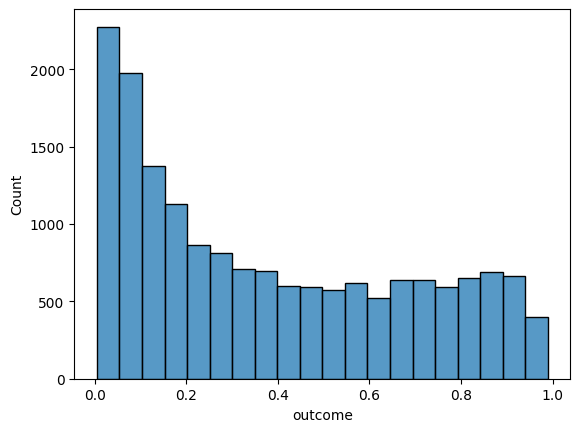

In [79]:
# compare new predictions to test data predictions
sns.histplot(fin_pred.outcome, bins=20)

<Axes: ylabel='Count'>

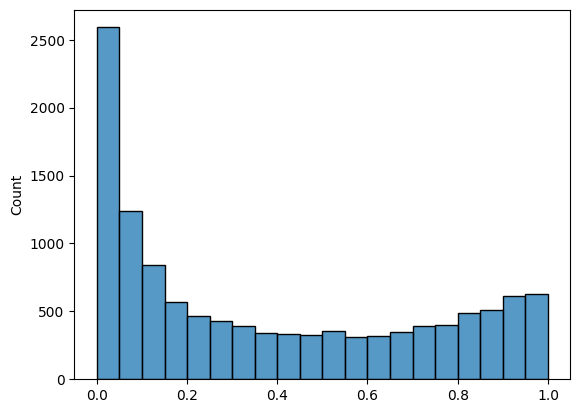

In [80]:
# plot old predictions
sns.histplot(clf_gb.predict_proba(X_test)[:,1], bins=20)